In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

import datetime

from scipy.optimize import curve_fit


cases = [0, 35,50,76,115,160,217,328,417,563,659,1007,1227,1467,1977,2484,3198,4038,4950,5704,6741,7779,9022,10290,11575,12385,13672,14797,15754,16889,18038,19062,19977,21108,21721,22617,23443,24865,25609,26436,27185,28001,28712,29791,30681,30989,31682,32296,33008,33357,33857,34901,35641,36260,37084,37629,38195,39026,39399,40206,40805,41193,42140,42622,43435,44369,45046,45828,46687,47192,47722,48933,49714,50394,51139,52023,52535,52916,53571,54790,55723,56467,57138,57759,59084,60512,61825,63103,64290,65262,66365,67744,69452,71366,74007,75991,77760,80560,83186,86413,90259,94333,97849,100793,104099,109644,114679,123676,133320,141903,147201,153332,159935,170106,179652,191181,201302,207677,215069,225119,234109,245612,256036,271430,284132,293383,303627,317678,329215,339607,352162,362573,372071,381916,392228,404749,417023,426425,435372,444659,454163,464180,473242,482943,490091,494872,500352,505794,513491,521224,529778,536045,540226,546093,554252,560526,566712,573103,576905,579599,583461,587601,592184,596897,601235,604227,606499,609188,612428,615717,619555,622772,625371,627267,631040,633442,637013,640211]
deaths = [0,2,2,3,4,5,6,8,9,11,12,13,18,20,23,29,46,56,60,71,85,101,144,170,195,221,254,296,323,371,419,446,461,499,571,614,668,726,748,774,823,867,927,987,1046,1055,1074,1088,1171,1218,1268,1314,1364,1379,1399,1471,1539,1600,1669,1716,1721,1735,1782,1829,1876,1918,1965,1973,1997,2052,2096,2145,2190,2233,2237,2252,2259,2320,2364,2413,2447,2452,2461,2531,2567,2610,2660,2691,2703,2715,2769,2803,2851,2881,2928,2934,2941,2996,3021,3064,3107,3147,3164,3176,3240,3285,3329,3366,3392,3419,3447,3505,3554,3618,3686,3703,3732,3778,3841,3890,4009,4102,4197,4242,4277,4409,4521,4677,4805,4898,4985,5075,5207,5347,5520,5653,5778,5855,5933,6119,6335,6587,6843,7022,7084,7157,7402,7627,7747,7927,8109,8186,8282,8558,8770,8917,9146,9351,9458,9541,9764,9938,10056,10177,10282,10333,10399,10585,10738,10873,10962,11110,11125,11189,11379,11503,11655,11755]

In [2]:
def diff(arr):
    new = [arr[0]]
    new.extend((arr[i+1]-arr[i]) for i in range(len(arr)-1))
    return new


del_cases = diff(cases)
del_deaths = diff(deaths)

In [3]:
print(len(cases), len(deaths))

178 178


In [4]:
print(datetime.datetime.strptime('2020 '+'72', '%Y %j'))

2020-03-12 00:00:00


In [52]:
interval = [[0,35], [34, 86], [85, 160], [160, 178], [177, 250]]
fit = [3,3,5, 1]

dates = [datetime.datetime.strptime('2020 '+ str(i+72), '%Y %j').strftime('%m/%d') for i in range(284)]
print(cases[34], cases[84], cases[160], cases[177])
print(deaths[84], deaths[160])
print(not None)

21721 59084 583461 640211
2567 9764
True


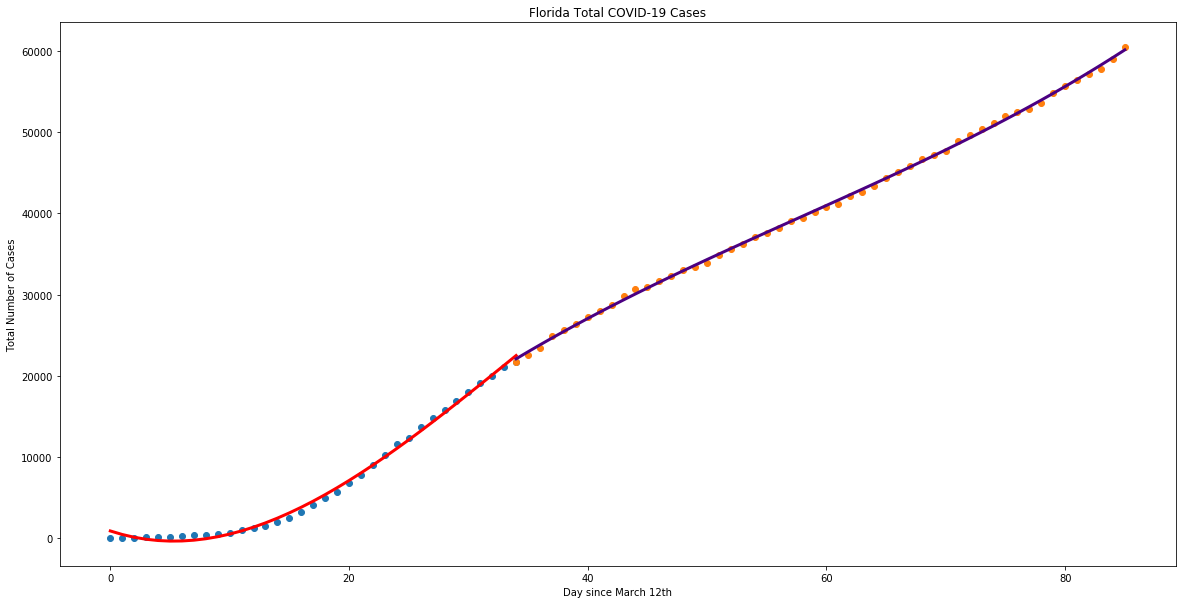

[960316.5, 2000, 122.0]
max jdlf 709659.2890959071
linear max 872527.7688338483
         3         2
-0.4885 x + 49.59 x - 485.8 x + 880.9           5          4         3             2
0.001354 x - 0.8417 x + 204.4 x - 2.418e+04 x + 1.396e+06 x - 3.155e+07         3         2
0.1299 x - 22.47 x + 1956 x - 2.356e+04
 
3216 x + 7.185e+04


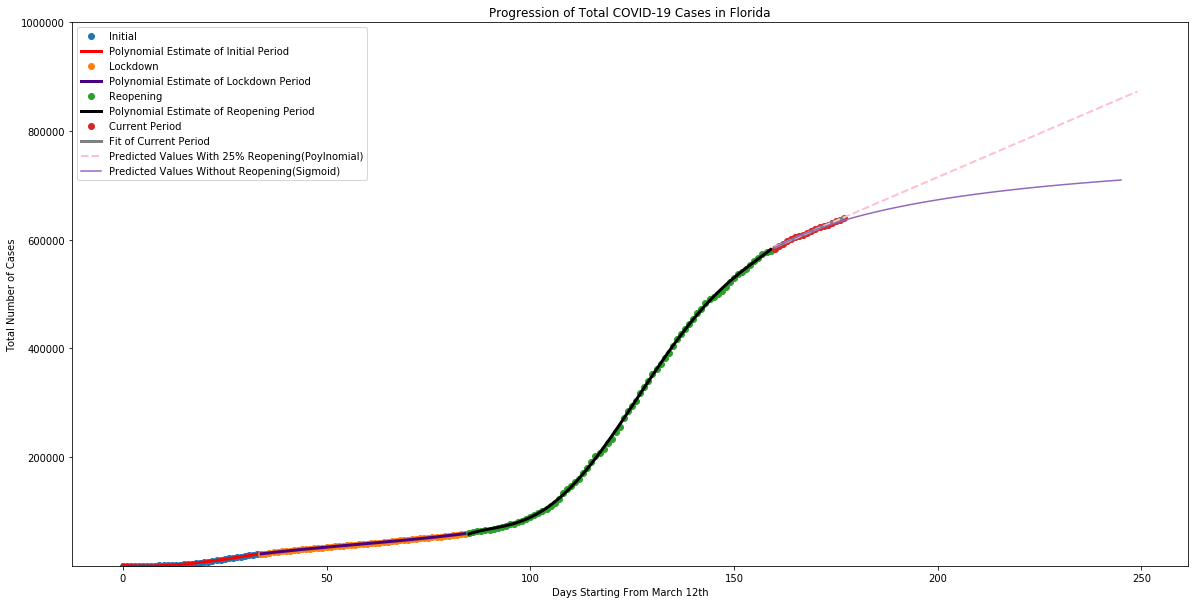

In [74]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
colors = ['red', 'indigo', 'black', 'gray']


def cr(num, num2 = None):
    if not num2:
        return np.arange(interval[num][0], interval[num][1])
    else:
        return np.arange(interval[num][0], interval[num2][1])

    
labels = ['Initial','Polynomial Estimate of Initial Period', 'Lockdown','Polynomial Estimate of Lockdown Period', 
          'Reopening', 'Polynomial Estimate of Reopening Period','Current Period', 'Fit of Current Period', 'Predicted Values With 25% Reopening(Poylnomial)',
          'Predicted Values Without Reopening(Sigmoid)','Predicted Values if reopening is continued']


def return_poly(fit_arr, ran):
    polys = []
    for i in range(ran):
        
        e = interval[i][1]
        s = interval[i][0]
        t = np.arange(s, e)
        coefs = np.polyfit(t, fit_arr[s:e], fit[i])
        tmp = np.poly1d(coefs)
        plt.plot(np.arange(s, e), fit_arr[s:e], 'o')
        plt.plot(np.arange(s, e), tmp(t), color = colors[i], linewidth = 3.0)
        plt.ylabel("Total Number of Cases")
        plt.xlabel("Day since March 12th")
        polys.append(tmp)
        
    return polys    
fit_arr = cases        
e = interval[1][1]
s = interval[1][0]
t = np.arange(s, e)
coefs = np.polyfit(t, fit_arr[s:e], 2)
tmp = np.poly1d(coefs)    


return_poly(cases, 2)
plt.title("Florida Total COVID-19 Cases")
plt.show()

start, mid, end, f = return_poly(cases, 4)

new = cr(2)

points = interval[3][1]-interval[2][0]

#plt.plot(np.arange(cr(2)[0], cr(2)[0]+points), mid(np.arange(cr(2)[0], cr(2)[0]+points)), '--', color = 'cyan', linewidth = 2.0)

#plt.plot(np.arange(cr(2)[0], cr(2)[0]+points), tmp(np.arange(cr(2)[0], cr(2)[0]+points)), '--', color = 'darkgoldenrod', linewidth = 2.0)


def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

def expo(x, a, b, c):
    return a*np.exp(b*x)+c

def new_sig(x, a, b, c):
    x = x/3
    return a*x/(b+c*np.abs(x))




#p0 = [max(cases), np.median(cr(2)),0.01,10000] # this is an mandatory initial guess

p0 = [1.5*max(cases), 2000, np.median(cr(2))]
print(p0)

jdlf = 585000+25*new_sig(cr(0,1),1.5*max(cases), 2000, np.median(cr(2)))
print('max jdlf',max(jdlf))
plt.plot(cr(3,4), f(cr(3,4)), '--', color = 'pink', linewidth = 2.0)

plt.plot(cr(0,1)+160,jdlf )

#popt, pcov = curve_fit(new_sig, cr(2, 3), cases[interval[2][0]:interval[3][1]],p0, method='dogbox')

#plt.plot(cr(2), cases[interval[2][0]:interval[2][1]] )

curve = [sigmoid(cr(2)[0]+i, popt[0], popt[1], popt[2], popt[3]) for i in range(len(cr(2,4)))]

#plt.plot(cr(2,4), np.copy(curve)+10000, linewidth = 3.0, color = 'darkkhaki')

print('linear max', max( f(cr(3,4))))

plt.xlabel('Days Starting From March 12th')
plt.ylabel('Total Number of Cases')
plt.title("Progression of Total COVID-19 Cases in Florida")

print(start, end, mid)

plt.ylim(bottom = 1, top = 1e6)

#plt.yscale('log')

plt.legend(labels = labels)
print(f)

plt.show()

[ 85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159]


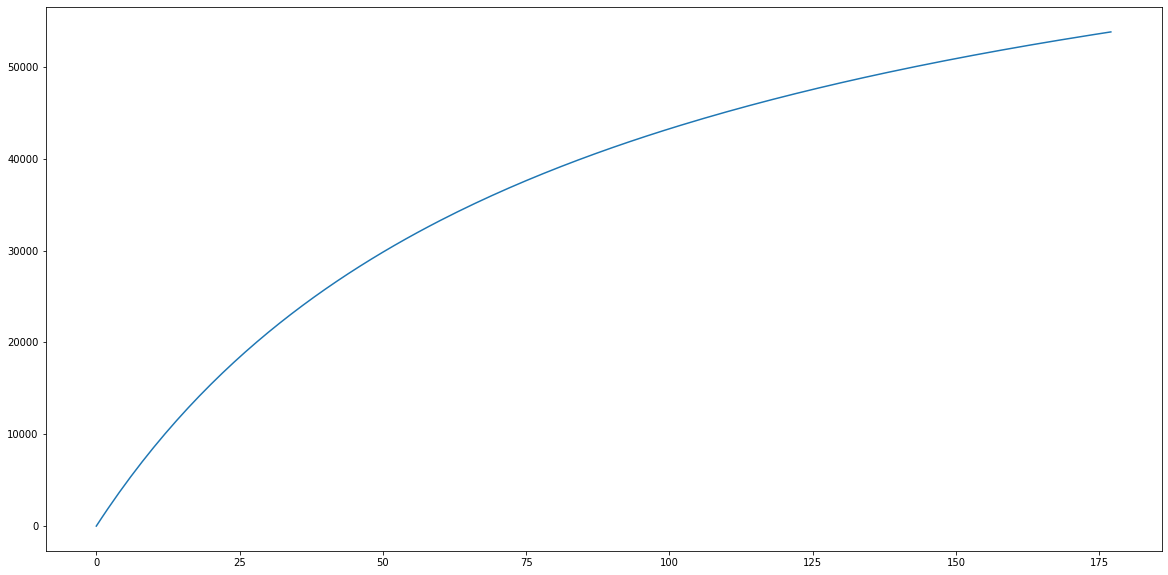

In [51]:
print(cr(2))


plt.show()

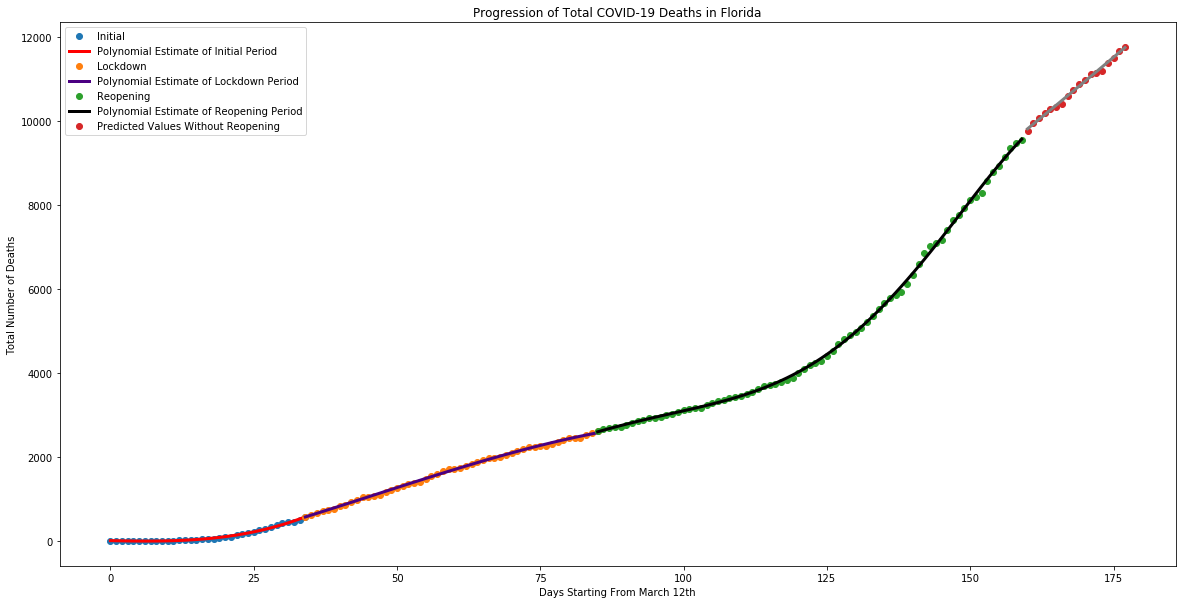

In [11]:
d_s, d_m, d_e,f = return_poly(deaths, 4)

new = cr(2)

points = interval[3][1]-interval[2][0]

new = np.arange(cr(2)[0], cr(2)[0]+points)

#plt.plot(new, d_m(new), color = 'cyan', linewidth = 4.0)

plt.xlabel('Days Starting From March 12th')
plt.ylabel('Total Number of Deaths')
plt.title("Progression of Total COVID-19 Deaths in Florida")

plt.legend(labels = ['Initial','Polynomial Estimate of Initial Period', 'Lockdown','Polynomial Estimate of Lockdown Period', 'Reopening', 'Polynomial Estimate of Reopening Period','Predicted Values Without Reopening'])


In [61]:
printt = []

for i in range(10):
    print("Cases:", end(i*10+158))
    
for i in range(10):
    print("Deaths:", d_e(i*10+158))

Cases: 573788.0165425241
Cases: 655996.0862400644
Cases: 860113.1180983931
Cases: 1359792.2362438217
Cases: 2419097.869584091
Cases: 4409273.86654406
Cases: 7825511.609799929
Cases: 13303718.131014012
Cases: 21637284.225571923
Cases: 33793852.567313366
Deaths: 9409.450968751946
Deaths: 10334.48372162065
Deaths: 9302.335385764629
Deaths: 4535.831614872615
Deaths: -6404.38201531177
Deaths: -26715.841504497846
Deaths: -60450.26592535
Deaths: -112609.5589209936
Deaths: -189241.81020251836
Deaths: -297537.29704648425
